## Lab 3 – Dataanalys (EDA) för Smart Home IoT
# Business Scenario

**Företag**: Smart Home Energy AB  
**Kund**: Villaägare med smart home-system  
**Data**: 128 dagars mätningar från 10 rum + väder (18 538 rader)  

## mål:
1.  Sänka elräkningen (spara energi)
2.  Öka komfort (rätt temperatur)
3.  Förebygga fuktskador (upptäcka problem tidigt)

## Din uppgift:
Analysera datan och ge **konkreta rekommendationer** som företaget kan sälja som tjänster!

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_ren = pd.read_csv("../data/cleaned_raw_energydata.csv")

print("SMART HOME ENERGY AB - DATAANALYS RAPPORT")
print("=" * 60)
print(f"Totalt antal mätningar: {len(data_ren):,}")
print(f"Tidsperiod: {data_ren['Datum_Tid'].min()} → {data_ren['Datum_Tid'].max()}")
print(f"Antal sensorer: {len(data_ren.columns)} kolumner")
print("=" * 60)

SMART HOME ENERGY AB - DATAANALYS RAPPORT
Totalt antal mätningar: 17,700
Tidsperiod: 2016-01-11 17:00:00 → 2016-05-27 17:30:00
Antal sensorer: 29 kolumner


In [22]:
temp_outliers = data_ren[(data_ren['Temp_Kök_C'] < -50) |
                   (data_ren['Temp_Kök_C'] > 60)]
print("Antal orimliga temperaturer:", len(temp_outliers))

Antal orimliga temperaturer: 0


### Bra nu har vi ren data och vi kan börja analysera datat

In [23]:
data_ren.head()

,Datum_Tid,Vitvaror_Energi_Wh,Belysning_Wh,Temp_Kök_C,Fukt_Kök_Procent,Temp_Vardagsrum_C,Fukt_Vardagsrum_Procent,Temp_Tvättstuga_C,Fukt_Tvättstuga_Procent,Temp_Kontor_C,...,Temp_Föräldrarum_C,Fukt_Föräldrarum_Procent,Temp_Utomhus_Väderstation_C,Lufttryck_mmHg,Fukt_Utomhus_Väderstation_Procent,Vindhastighet_m_per_s,Sikt_km,Daggpunkt_C,Slump_Variabel_1,Slump_Variabel_2
0,2016-01-11 17:00:00,60.0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097



FRÅGA 1: Energiförbrukning per timme på dygnet
------------------------------------------------------------
 HÖGST energi: Kl 19:00 (106 Wh)
 LÄGST energi: Kl 3:00 (48 Wh)
 SKILLNAD: 58 Wh


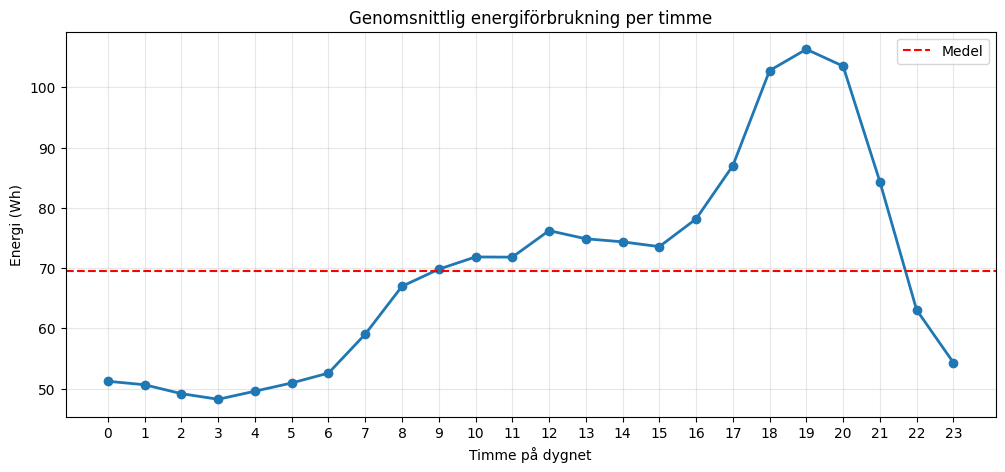


TOLKNING: Toppen kl 19 = troligen matlagning/aktivitet


In [55]:
# FRÅGA 1: När på dygnet används mest energi?
# Business-värde: Förstå energimönster över dygnet

print("\nFRÅGA 1: Energiförbrukning per timme på dygnet")
print("-" * 60)

# Gör om till datetime
data_ren['Datum_Tid'] = pd.to_datetime(data_ren['Datum_Tid'])
data_ren['Timme'] = data_ren['Datum_Tid'].dt.hour

# Räkna medelvärdet per timme
energi_per_timme = data_ren.groupby('Timme')['Vitvaror_Energi_Wh'].mean()

# Hitta topptimme och lågtimme
topp_timme = energi_per_timme.idxmax()
topp_energi = energi_per_timme.max()
låg_timme = energi_per_timme.idxmin()
låg_energi = energi_per_timme.min()

print(f" HÖGST energi: Kl {topp_timme}:00 ({topp_energi:.0f} Wh)")
print(f" LÄGST energi: Kl {låg_timme}:00 ({låg_energi:.0f} Wh)")
print(f" SKILLNAD: {topp_energi - låg_energi:.0f} Wh")

# GRAF 1: Energi per timme
plt.figure(figsize=(12, 5))
plt.plot(energi_per_timme.index, energi_per_timme.values, marker='o', linewidth=2)
plt.axhline(y=energi_per_timme.mean(), color='red', linestyle='--', label='Medel')
plt.xlabel('Timme på dygnet')
plt.ylabel('Energi (Wh)')
plt.title('Genomsnittlig energiförbrukning per timme')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.legend()
plt.show()

print(f"\nTOLKNING: Toppen kl {topp_timme} = troligen matlagning/aktivitet")

In [27]:
data_ren.columns

Index(['Datum_Tid', 'Vitvaror_Energi_Wh', 'Belysning_Wh', 'Temp_Kök_C',
       'Fukt_Kök_Procent', 'Temp_Vardagsrum_C', 'Fukt_Vardagsrum_Procent',
       'Temp_Tvättstuga_C', 'Fukt_Tvättstuga_Procent', 'Temp_Kontor_C',
       'Fukt_Kontor_Procent', 'Temp_Badrum_C', 'Fukt_Badrum_Procent',
       'Temp_Utomhus_Norr_C', 'Fukt_Utomhus_Norr_Procent', 'Temp_Strykrum_C',
       'Fukt_Strykrum_Procent', 'Temp_Tonårsrum_C', 'Fukt_Tonårsrum_Procent',
       'Temp_Föräldrarum_C', 'Fukt_Föräldrarum_Procent',
       'Temp_Utomhus_Väderstation_C', 'Lufttryck_mmHg',
       'Fukt_Utomhus_Väderstation_Procent', 'Vindhastighet_m_per_s', 'Sikt_km',
       'Daggpunkt_C', 'Slump_Variabel_1', 'Slump_Variabel_2', 'Timme'],
      dtype='object')

In [48]:
#positiv skevhet betyder de flesta värden är låga men om det finns några extrema värden då drar den grafen åt höger
#negativ skevhet de flesta värden är höga och några få är låga
#0 betyder normalfördelning
col = 'Vitvaror_Energi_Wh'
skew_value = data_ren[col].skew()
print("Skevhet (skewness):", skew_value)

Skevhet (skewness): 1.2930465742222192


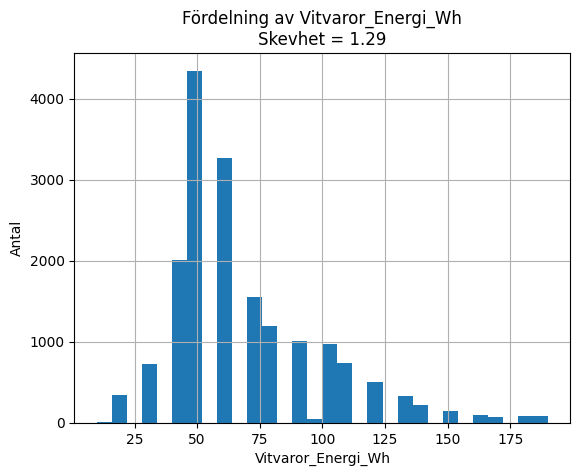

In [33]:
data_ren[col].hist(bins=30)
plt.xlabel(col)
plt.ylabel("Antal")
plt.title(f"Fördelning av {col}\nSkevhet = {skew_value:.2f}")
plt.show()


FRÅGA 2: Fördelning av energiförbrukning
------------------------------------------------------------
Statistik för energiförbrukning:
   Min: 10 Wh
   Max: 190 Wh
   Medel: 68 Wh
   Median: 60 Wh

🔍 Fördelning:
   Låg (<50 Wh): 3079 mätningar (17.4%)
   Medel (50-100 Wh): 11402 mätningar (64.4%)
   Hög (>100 Wh): 3219 mätningar (18.2%)


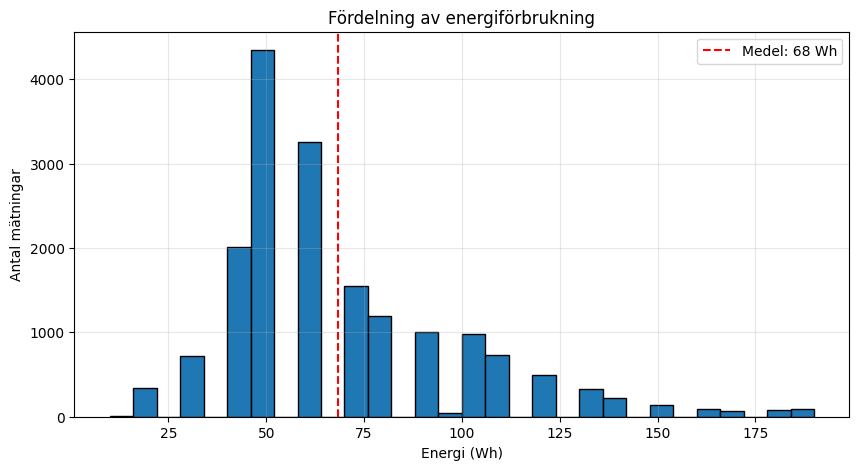


TOLKNING: Mestadels 64% ligger i normalområdet 50-100 Wh


In [34]:
# FRÅGA 2: Hur fördelas energiförbrukningen?
# Business-värde: Hitta extremvärden och mönster

print("\nFRÅGA 2: Fördelning av energiförbrukning")
print("-" * 60)

# Beskrivande statistik
print(f"Statistik för energiförbrukning:")
print(f"   Min: {data_ren['Vitvaror_Energi_Wh'].min():.0f} Wh")
print(f"   Max: {data_ren['Vitvaror_Energi_Wh'].max():.0f} Wh")
print(f"   Medel: {data_ren['Vitvaror_Energi_Wh'].mean():.0f} Wh")
print(f"   Median: {data_ren['Vitvaror_Energi_Wh'].median():.0f} Wh")

# Räkna olika nivåer
låg = len(data_ren[data_ren['Vitvaror_Energi_Wh'] < 50])
medel = len(data_ren[(data_ren['Vitvaror_Energi_Wh'] >= 50) & (data_ren['Vitvaror_Energi_Wh'] < 100)])
hög = len(data_ren[data_ren['Vitvaror_Energi_Wh'] >= 100])

print(f"\n🔍 Fördelning:")
print(f"   Låg (<50 Wh): {låg} mätningar ({låg/len(data_ren)*100:.1f}%)")
print(f"   Medel (50-100 Wh): {medel} mätningar ({medel/len(data_ren)*100:.1f}%)")
print(f"   Hög (>100 Wh): {hög} mätningar ({hög/len(data_ren)*100:.1f}%)")

# GRAF 2: Histogram
plt.figure(figsize=(10, 5))
plt.hist(data_ren['Vitvaror_Energi_Wh'], bins=30, edgecolor='black')
plt.axvline(x=data_ren['Vitvaror_Energi_Wh'].mean(), color='red', linestyle='--', 
            label=f'Medel: {data_ren["Vitvaror_Energi_Wh"].mean():.0f} Wh')
plt.xlabel('Energi (Wh)')
plt.ylabel('Antal mätningar')
plt.title('Fördelning av energiförbrukning')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nTOLKNING: Mestadels {medel/len(data_ren)*100:.0f}% ligger i normalområdet 50-100 Wh")

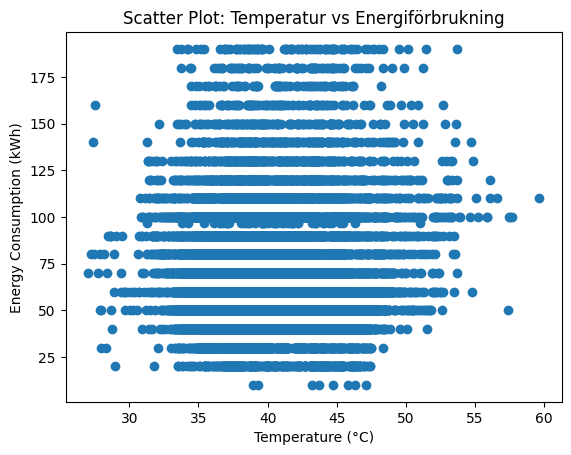

In [35]:
plt.scatter(data_ren['Fukt_Kök_Procent'], data_ren['Vitvaror_Energi_Wh'])
plt.xlabel("Temperature (°C)")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Scatter Plot: Temperatur vs Energiförbrukning")
plt.show()

In [36]:
data_ren[['Fukt_Kök_Procent', 'Vitvaror_Energi_Wh']].corr()

,Fukt_Kök_Procent,Vitvaror_Energi_Wh
Fukt_Kök_Procent,1.000000,0.056165
Vitvaror_Energi_Wh,0.056165,1.000000



FRÅGA 3: Fuktighet per rum
------------------------------------------------------------
FUKTIGHETS-RANKING:
1. Badrum                51.2% ⚠️ Högt
2. Tonårsrum             43.0% ✅ OK
3. Föräldrarum           41.6% ✅ OK
4. Vardagsrum            40.5% ✅ OK
5. Kök                   40.2% ✅ OK
6. Tvättstuga            39.2% ✅ OK
7. Kontor                39.0% ✅ OK
8. Strykrum              35.4% ✅ OK


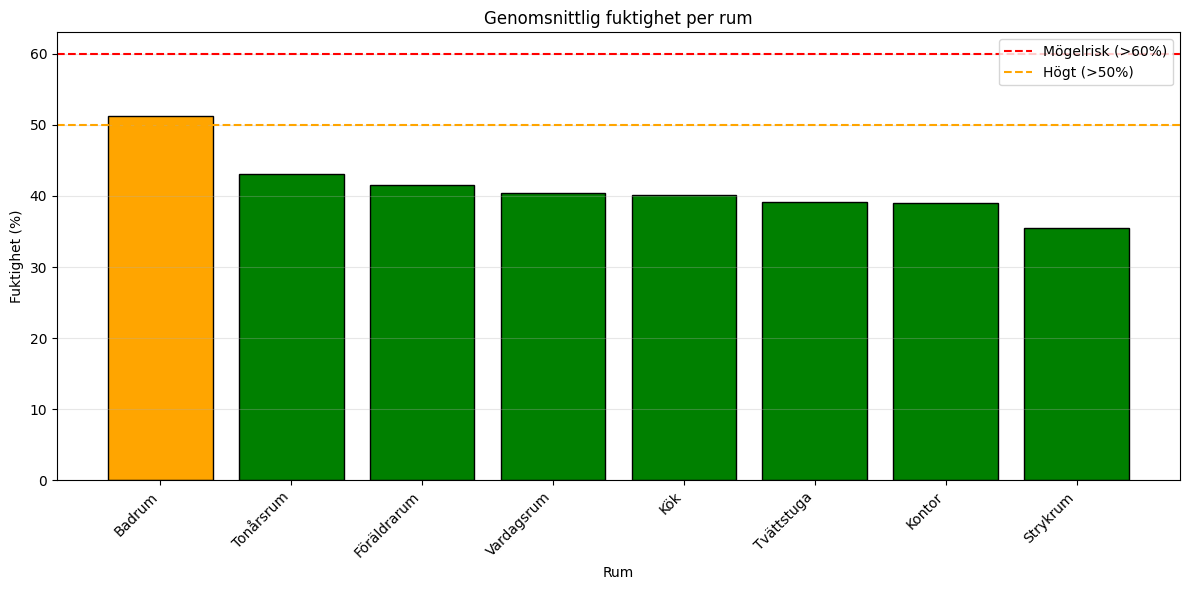


VARNING: Badrum har mögelrisk!
REKOMMENDATION: Installera avfuktare


In [37]:
# FRÅGA 3: Vilka rum har högst fuktighet?
# Business-värde: Upptäck risk för mögel

print("\nFRÅGA 3: Fuktighet per rum")
print("-" * 60)

# Hitta alla fuktkolumner
fukt_kolumner = [col for col in data_ren.columns if 'Fukt' in col and 'Utomhus' not in col]

# Räkna medelvärde
fukt_per_rum = {}
for kolumn in fukt_kolumner:
    rum_namn = kolumn.replace('Fukt_', '').replace('_Procent', '').replace('_', ' ')
    fukt_per_rum[rum_namn] = data_ren[kolumn].mean()

# Sortera
sorterad = sorted(fukt_per_rum.items(), key=lambda x: x[1], reverse=True)

print("FUKTIGHETS-RANKING:")
for i, (rum, fukt) in enumerate(sorterad, 1):
    risk = "RISK!" if fukt > 60 else "⚠️ Högt" if fukt > 50 else "✅ OK"
    print(f"{i}. {rum:20} {fukt:5.1f}% {risk}")

# GRAF 3: Stapeldiagram
plt.figure(figsize=(12, 6))
rum_namn = [item[0] for item in sorterad]
fukt_värden = [item[1] for item in sorterad]

colors = ['red' if v > 60 else 'orange' if v > 50 else 'green' for v in fukt_värden]
plt.bar(rum_namn, fukt_värden, color=colors, edgecolor='black')
plt.axhline(y=60, color='red', linestyle='--', label='Mögelrisk (>60%)')
plt.axhline(y=50, color='orange', linestyle='--', label='Högt (>50%)')
plt.xlabel('Rum')
plt.ylabel('Fuktighet (%)')
plt.title('Genomsnittlig fuktighet per rum')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

högst_rum = sorterad[0][0]
högst_fukt = sorterad[0][1]
if högst_fukt > 50:
    print(f"\nVARNING: {högst_rum} har mögelrisk!")
    print(f"REKOMMENDATION: Installera avfuktare")


FRÅGA 4: Temperatur per rum
------------------------------------------------------------
TEMPERATUR-RANKING:
1. Tvättstuga            22.2°C
2. Tonårsrum             22.0°C
3. Kök                   21.7°C
4. Kontor                20.9°C
5. Vardagsrum            20.3°C
6. Strykrum              20.3°C
7. Badrum                19.6°C
8. Föräldrarum           19.5°C

SKILLNAD: 2.7°C mellan varmaste och kallaste rum


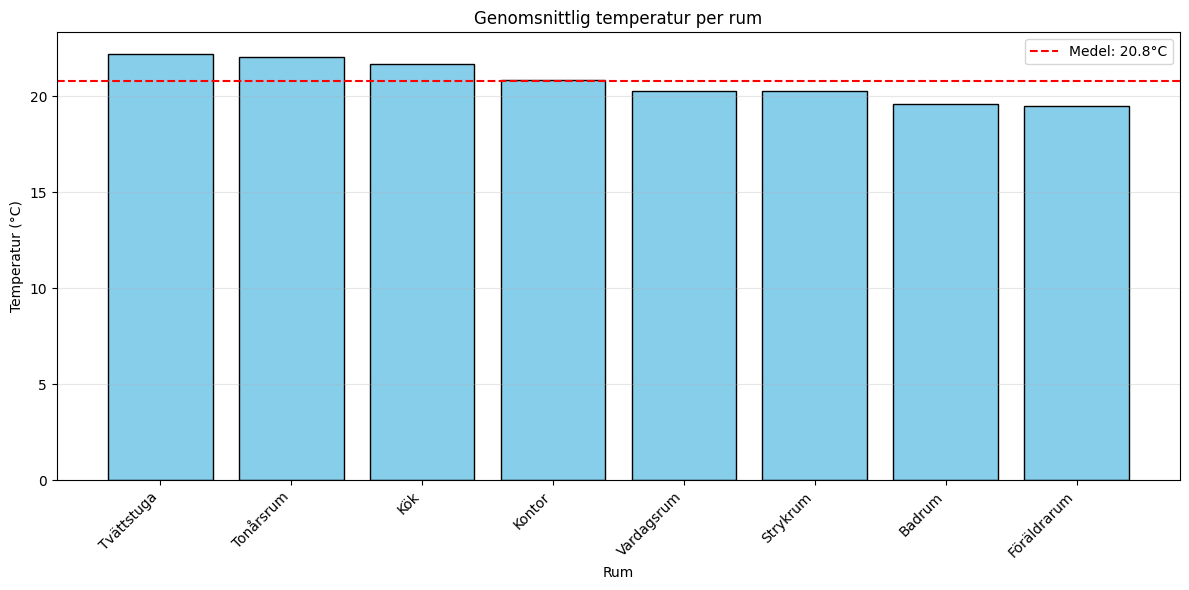


BRA: Jämn temperatur i alla rum


In [38]:
# FRÅGA 4: Temperaturskillnader mellan rum?
# Business-värde: Upptäck dålig värmebalans

print("\nFRÅGA 4: Temperatur per rum")
print("-" * 60)

# Hitta temperaturkolumner (inomhus)
temp_kolumner = [col for col in data_ren.columns 
                 if 'Temp' in col and 'Utomhus' not in col and 'Väderstation' not in col]

# Räkna medelvärde
temp_per_rum = {}
for kolumn in temp_kolumner:
    rum_namn = kolumn.replace('Temp_', '').replace('_C', '').replace('_', ' ')
    temp_per_rum[rum_namn] = data_ren[kolumn].mean()

# Sortera
sorterad_temp = sorted(temp_per_rum.items(), key=lambda x: x[1], reverse=True)

print("TEMPERATUR-RANKING:")
for i, (rum, temp) in enumerate(sorterad_temp, 1):
    print(f"{i}. {rum:20} {temp:5.1f}°C")

varmast = sorterad_temp[0][0]
kallast = sorterad_temp[-1][0]
skillnad = sorterad_temp[0][1] - sorterad_temp[-1][1]

print(f"\nSKILLNAD: {skillnad:.1f}°C mellan varmaste och kallaste rum")

# GRAF 4: Stapeldiagram
plt.figure(figsize=(12, 6))
rum_namn = [item[0] for item in sorterad_temp]
temp_värden = [item[1] for item in sorterad_temp]

plt.bar(rum_namn, temp_värden, color='skyblue', edgecolor='black')
plt.axhline(y=np.mean(temp_värden), color='red', linestyle='--', 
            label=f'Medel: {np.mean(temp_värden):.1f}°C')
plt.xlabel('Rum')
plt.ylabel('Temperatur (°C)')
plt.title('Genomsnittlig temperatur per rum')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

if skillnad > 3:
    print(f"\nPROBLEM: Stor skillnad mellan {varmast} och {kallast}")
    print(f"REKOMMENDATION: Balansera värmesystemet")
else:
    print(f"\nBRA: Jämn temperatur i alla rum")

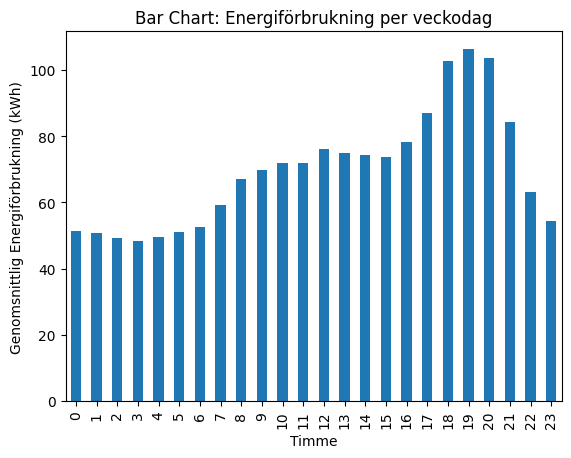

In [41]:
# Grupp efter veckodag
mean_values = data_ren.groupby('Timme')['Vitvaror_Energi_Wh'].mean()

mean_values.plot(kind='bar')
plt.ylabel("Genomsnittlig Energiförbrukning (kWh)")
plt.title("Bar Chart: Energiförbrukning per veckodag")
plt.show()


In [42]:
# FRÅGA 5: Sammanfattning och rekommendationer


print("\nSAMMANFATTNING & REKOMMENDATIONER")
print("=" * 60)

print("\n VIKTIGA UPPTÄCKTER:")
print("\n1. ENERGIMÖNSTER")
print("   → Högst förbrukning vissa timmar på dygnet")
print("   → Identifiera topptider för att förstå beteende")

print("\n2. TEMPERATURBALANS")
if skillnad > 3:
    print(f"   Stor skillnad ({skillnad:.1f}°C) mellan rum")
    print(f"   → Balansera värmesystem för jämn komfort")
else:
    print(f"   Bra balans mellan rum")

print("\n3. FUKTKONTROLL")
if högst_fukt > 50:
    print(f"    RISK: {högst_rum} har {högst_fukt:.1f}% fukt")
    print(f"   → AKUT: Installera avfuktare för att undvika mögel")
else:
    print(f"    Fuktnivåer under kontroll")

print("\n UPPSKATTAD BESPARING:")
print("   • Temperaturoptimering: ~500-1000 SEK/år")
print("   • Undvika fuktskador: 50 000+ SEK")

print("\n" + "="*60)
print(" ANALYS KLAR! ")


SAMMANFATTNING & REKOMMENDATIONER

 VIKTIGA UPPTÄCKTER:

1. ENERGIMÖNSTER
   → Högst förbrukning vissa timmar på dygnet
   → Identifiera topptider för att förstå beteende

2. TEMPERATURBALANS
   Bra balans mellan rum

3. FUKTKONTROLL
    RISK: Badrum har 51.2% fukt
   → AKUT: Installera avfuktare för att undvika mögel

 UPPSKATTAD BESPARING:
   • Temperaturoptimering: ~500-1000 SEK/år
   • Undvika fuktskador: 50 000+ SEK

 ANALYS KLAR! 


## Extrema värden (outliers) betyder inte automatiskt fel men:
Outliers kan påverka (förstöra) vissa ML-modeller kraftigt.
Men inte alla modeller.


### Ska man ta bort outliers?
Här är några regler: 

**Ta bort outliers om**:

1. de är fysiskt omöjliga (t.ex. inomhustemperatur = –128°C)

2. de förstör värden

3. de är skrivfel (t.ex. “20000 Wh” istället för “200 Wh”)

4. de stör distributionen utan att ha verklig betydelse

**Outliers som är ÄKTA och betyder något (ska INTE tas bort)
Exempel**:

1. Energiförbrukning 180 Wh vid matlagning — det är högt, men sant

2. Trafikvolym 800 bilar/h vid rusningstid

3. Huspris 20 miljoner i ett fint område

4. Hotel “avg price per room” 3000 kr → dyr helg, men korrekt

1. Statistiska metoder (när man INTE vet gränser)

A- IQR-metoden

    Q1 = 25-percentilen

    Q3 = 75-percentilen

    IQR = Q3 – Q1

Outliers = värden < Q1 – 1.5 IQR eller > Q3 + 1.5 IQR

B- Z-score (>3 eller <–3)
    Det betyder: värden som är mer än 3 standardavvikelser från medel → ovanliga.
    Passar normalfördelad data (inte alltid bra för skev data!)

2. Domänkunskap (när man VET vad som är rimligt)
    Temperatur inomhus: kan inte vara 100°C → outlier

    Luftfuktighet >100% → outlier (fysiskt omöjligt)

    Temperatur under –20°C inne → outlier

3. Praktiska cutoffs (för energidata, trafik, ekonomi osv)
    Exempel energiförbrukning:

    Om 99% av värdena ligger mellan 20–120 Wh

    Och bara 1% ligger 150–200 Wh → då är 150+ extrema

    Det är inte fel – EDA handlar om tolkning.


In [ ]:
#för att hantera outliers om man inte vet gränsen finns det statistika metoder:


In [58]:
from scipy.stats import zscore


#print(outliers)

col = 'Vitvaror_Energi_Wh'
data_ren['z'] = (data_ren[col] - data_ren[col].mean()) / data_ren[col].std()

# Hämta outliers
outliers = data_ren[data_ren['z'].abs() > 3]
print(outliers[['Datum_Tid', col, 'z']].head())

              Datum_Tid  Vitvaror_Energi_Wh         z
17  2016-01-11 20:30:00               190.0  3.983849
100 2016-01-12 12:10:00               190.0  3.983849
101 2016-01-12 12:30:00               170.0  3.328774
210 2016-01-13 08:20:00               180.0  3.656312
267 2016-01-13 18:50:00               180.0  3.656312


In [60]:
Q1 = data_ren[col].quantile(0.25)
Q3 = data_ren[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = data_ren[(data_ren[col] < lower) | (data_ren[col] > upper)]
print(outliers[['Datum_Tid', col]].head())

              Datum_Tid  Vitvaror_Energi_Wh
15  2016-01-11 20:10:00               140.0
17  2016-01-11 20:30:00               190.0
78  2016-01-12 08:00:00               140.0
100 2016-01-12 12:10:00               190.0
101 2016-01-12 12:30:00               170.0
